# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #print(city_url)
  
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #pprint(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = -city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | colonia
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | kharp
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | mount pearl
Processing Record 10 of Set 1 | enewetak
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | gagliano del capo
Processing Record 13 of Set 1 | sibolga
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | eyl
Processing Record 19 of Set 1 | la'ie
Processing Record 20 of Set 1 | plymouth
Processing Record 21 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 22 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,colonia,50.9333,-6.9500,293.07,90,100,2.57,DE,1694572527
1,hawaiian paradise park,19.5933,154.9731,300.88,72,0,4.12,US,1694572527
2,adamstown,-25.0660,130.1015,290.78,61,68,10.65,PN,1694572527
3,grytviken,-54.2811,36.5092,263.89,76,51,4.81,GS,1694572528
4,kharp,66.8014,-65.8081,284.94,77,16,2.76,RU,1694572528


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,colonia,50.9333,-6.9500,293.07,90,100,2.57,DE,1694572527
1,hawaiian paradise park,19.5933,154.9731,300.88,72,0,4.12,US,1694572527
2,adamstown,-25.0660,130.1015,290.78,61,68,10.65,PN,1694572527
3,grytviken,-54.2811,36.5092,263.89,76,51,4.81,GS,1694572528
4,kharp,66.8014,-65.8081,284.94,77,16,2.76,RU,1694572528


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

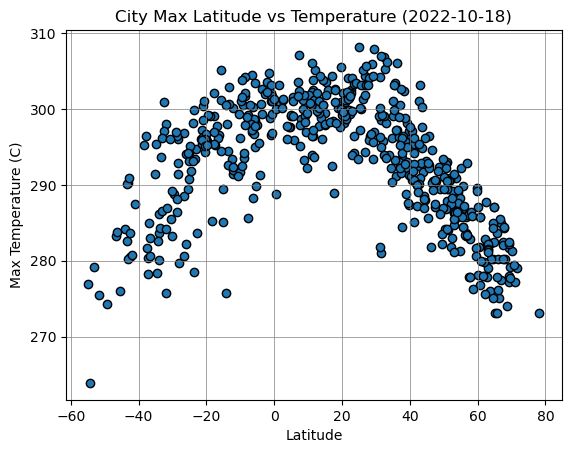

In [8]:
# Build scatter plot for latitude vs. temperature
Lat_vs_Temp = plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],edgecolors= "black") #facecolors="green", edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True, linestyle='-', linewidth=0.5, color='gray')

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

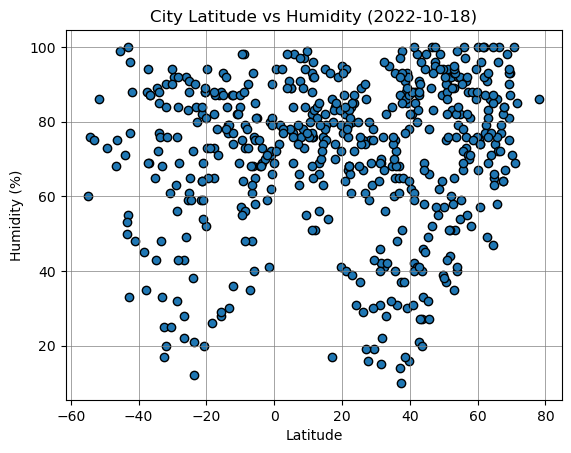

In [9]:
# Build the scatter plots for latitude vs. humidity
Lat_vs_Hum = plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True, linestyle='-', linewidth=0.5, color='gray')

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

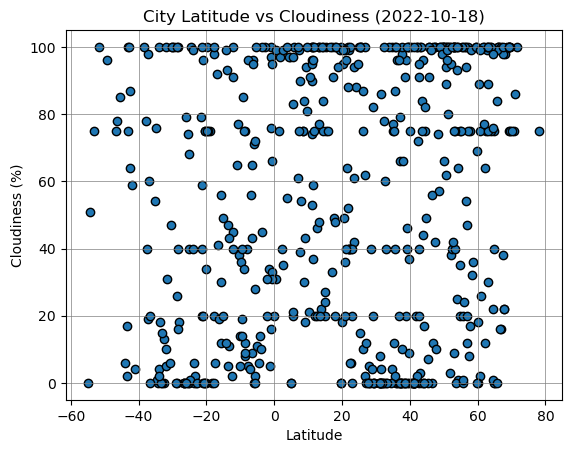

In [10]:
# Build the scatter plots for latitude vs. cloudiness
Lat_vs_Cloudiness = plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True, linestyle='-', linewidth=0.5, color='gray')

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

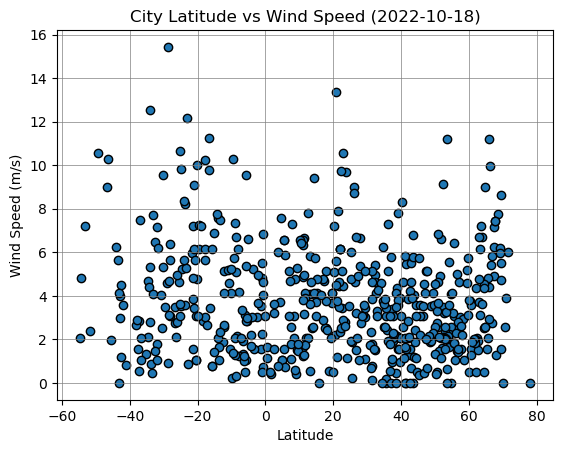

In [11]:
# Build the scatter plots for latitude vs. wind speed
Lat_vs_Wind = plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True, linestyle='-', linewidth=0.5, color='gray')

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
#pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(x_values, y_values)

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] >=0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,colonia,50.9333,-6.9500,293.07,90,100,2.57,DE,1694572527
1,hawaiian paradise park,19.5933,154.9731,300.88,72,0,4.12,US,1694572527
4,kharp,66.8014,-65.8081,284.94,77,16,2.76,RU,1694572528
6,bilibino,68.0546,-166.4372,280.24,67,98,1.30,RU,1694572348
7,kodiak,57.7900,152.4072,282.88,81,75,1.54,US,1694572529


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,130.1015,290.78,61,68,10.65,PN,1694572527
3,grytviken,-54.2811,36.5092,263.89,76,51,4.81,GS,1694572528
5,port-aux-francais,-49.3500,-70.2167,274.24,73,96,10.57,TF,1694572523
13,margaret river,-33.9500,-115.0667,286.13,85,100,12.53,AU,1694572535
14,puerto natales,-51.7236,72.4875,275.43,86,100,2.38,CL,1694572359


###  Temperature vs. Latitude Linear Regression Plot

In [14]:
# Linear regression on Northern Hemisphere (0, y=-0.51x+33.71)


The r-value is: 0.4121057168607245


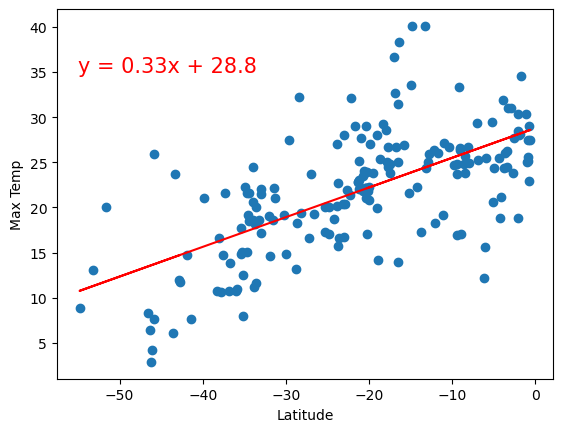

In [16]:
# Linear regression on Southern Hemisphere (y=0.33x+28.8, 0)
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


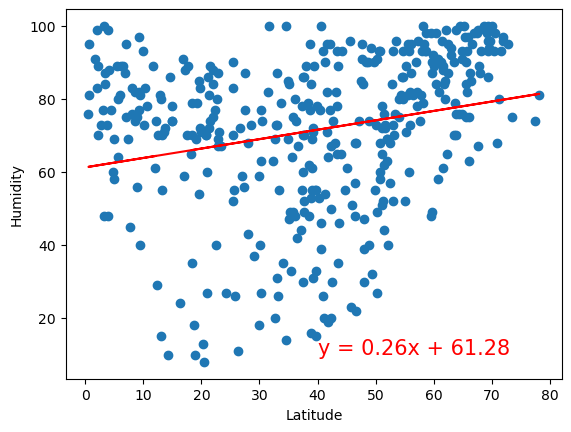

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


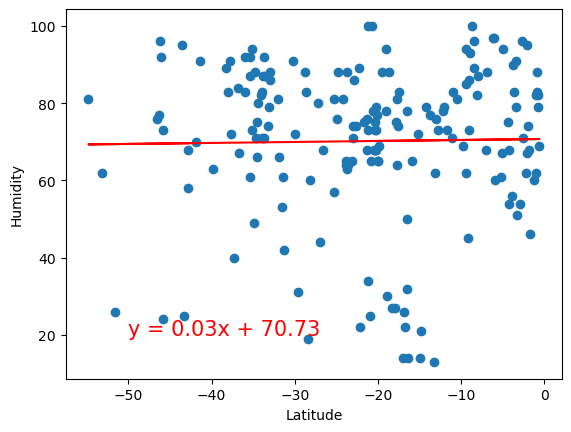

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


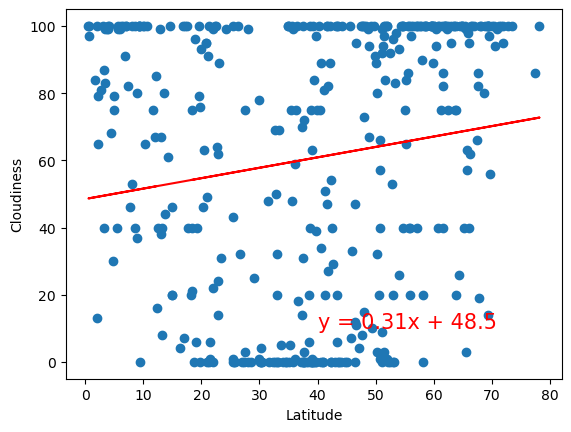

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


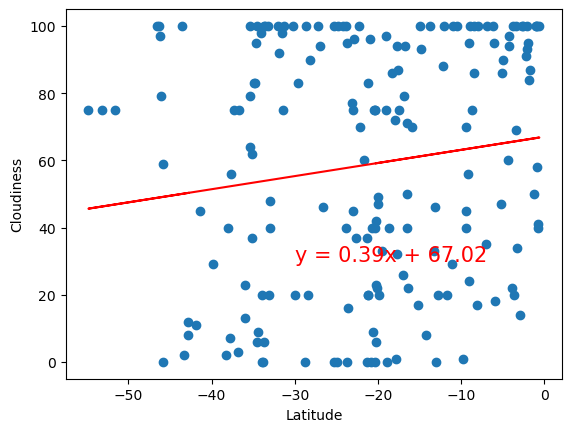

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


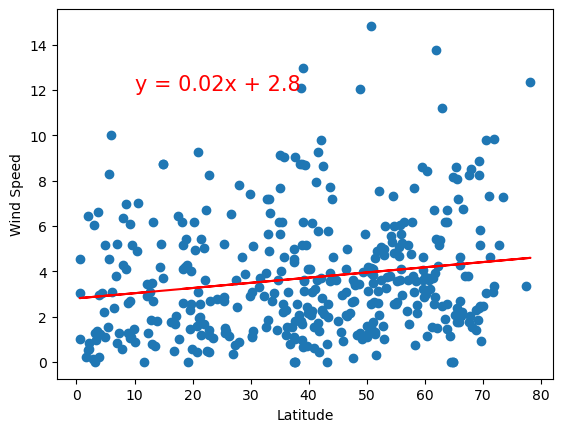

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


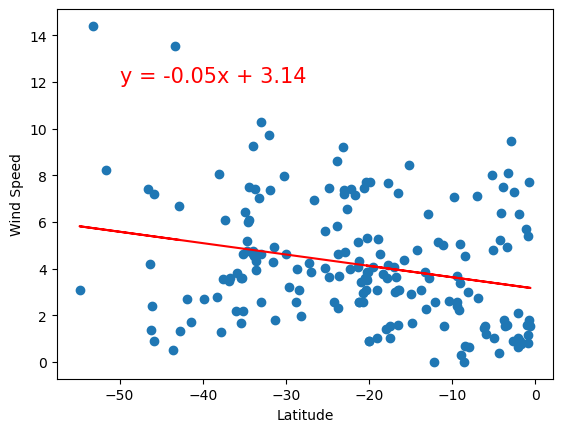

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE